# Nonlinear modeling (usind Echo-State Network)

In [1]:
import os
import numpy as np
import pickle

### SELECT DATA
#from config import MRI8_NVF4_10mm_0p0mmVVV as cfg
#from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

#from config import MRI6_NVF2_10mm_2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_1p8mmV_1 as cfg
from config import MRI5_NVF1_10mm_0p4mmV_1 as cfg

#from config import MRI5_NVF1_10mm_1p2mmV_1 as cfg
#from config import MRI5_NVF1_10mm_0p4mmV_1 as cfg

#from config import MRI6_NVF2_10mm_2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_1p8mmV_1 as cfg

#from config import MRI6_NVF2_10mm_1p2mmV_1 as cfg
#from config import MRI6_NVF2_10mm_0p4mmV_1 as cfg

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

In [2]:
os.chdir('../')

## Load data

In [3]:
[mic_t_data, mic_data, flow_data] = LoadCSV(
                                file_path=cfg.FILE_DIR+cfg.DATA_NAME+cfg.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic', 'flow'], 
                                sample_span=[0, None]
                                )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI5_NVF1_10mm_0p4mmV_1.csv
data list | t, mic, flow


In [4]:
### Unit conversion (flow_data [V] --> flow_data [l/min])
conversion_param = 40.
flow_data = (flow_data*conversion_param)[cfg.SAMPLE_SPAN[0]:cfg.SAMPLE_SPAN[1]]

print('mu = '+str(flow_data[0])+'[l/min]')

mu = 29.94384765625[l/min]


## Preprocess

In [5]:
preprocess = PreProcessing_forESN(data=mic_data, t_data=mic_t_data)
preprocess.filter(method=cfg.FILTER_METHOD, params=cfg.BANDPASS_PARAMS)
preprocess.cut(span=cfg.SAMPLE_SPAN, new_t=False)
preprocess.embed(n_shift=cfg.TRAIN_TEST_DATA_PARAMS['n_shift'], n_dimension=cfg.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X, train_Y, test_X, test_Y = preprocess.train_test_split(
                                                            n_train=cfg.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                            n_predstep=cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']
                                                            )
train_t = preprocess.t_data[cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y.shape[0]]
test_t = preprocess.t_data[cfg.TRAIN_TEST_DATA_PARAMS['n_train']+cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg.TRAIN_TEST_DATA_PARAMS['n_train']+cfg.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y.shape[0]]

In [6]:
print('tau = '+str(cfg.TRAIN_TEST_DATA_PARAMS['n_shift']*(train_t[1]-train_t[0])*1000)+'[ms]')

tau = 0.800000000005241[ms]


## Echo-State Network

### a. using learned model

In [7]:
esn = pickle.load(open(cfg.MODEL_DIR+cfg.DATA_NAME+'.pkl', 'rb'))

## Figure

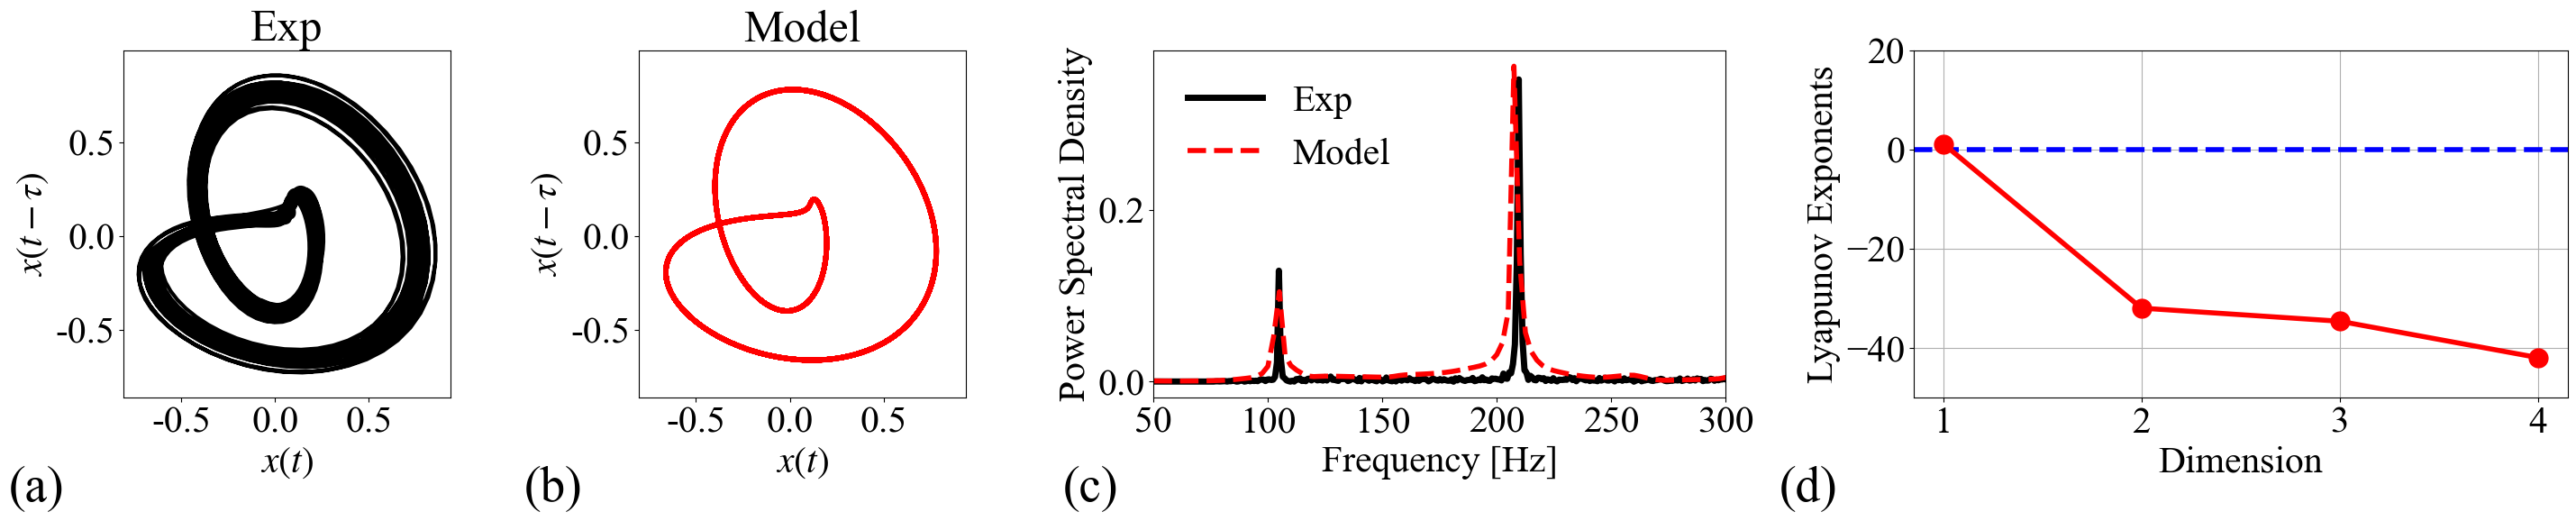

In [9]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVV
            n_shift=13, freq_lim=(50, 300), lyapunov_lim=(-50, 20), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure03-1.eps')

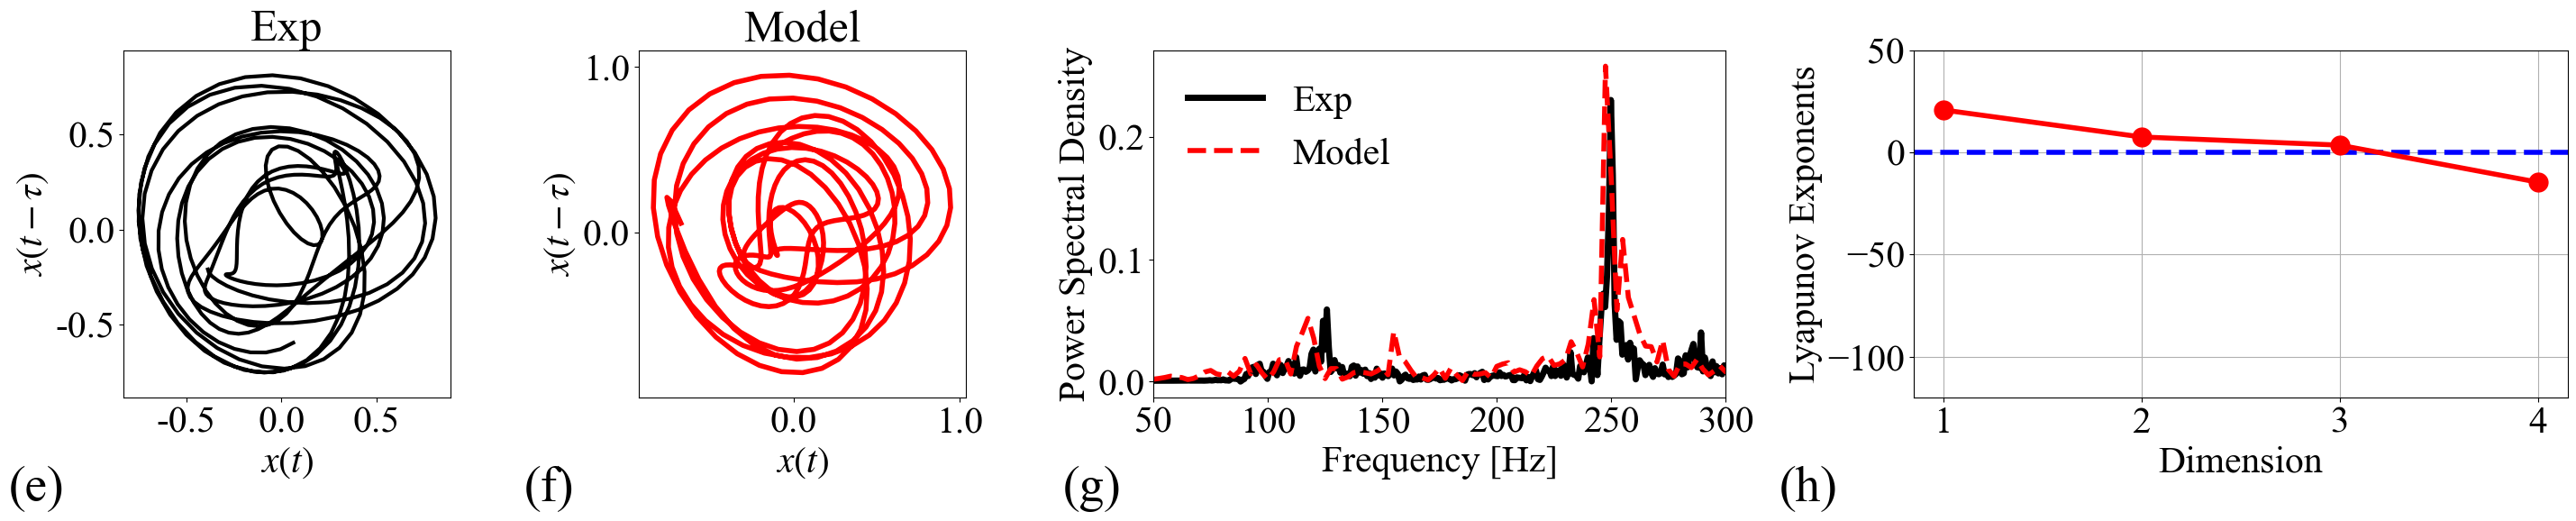

In [21]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=0, n_plt=450, n_shift=9, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-120, 50), panel_list = ['(e)', '(f)', '(g)', '(h)'], 

            save_filename='./results/figure/figure03-2.png')

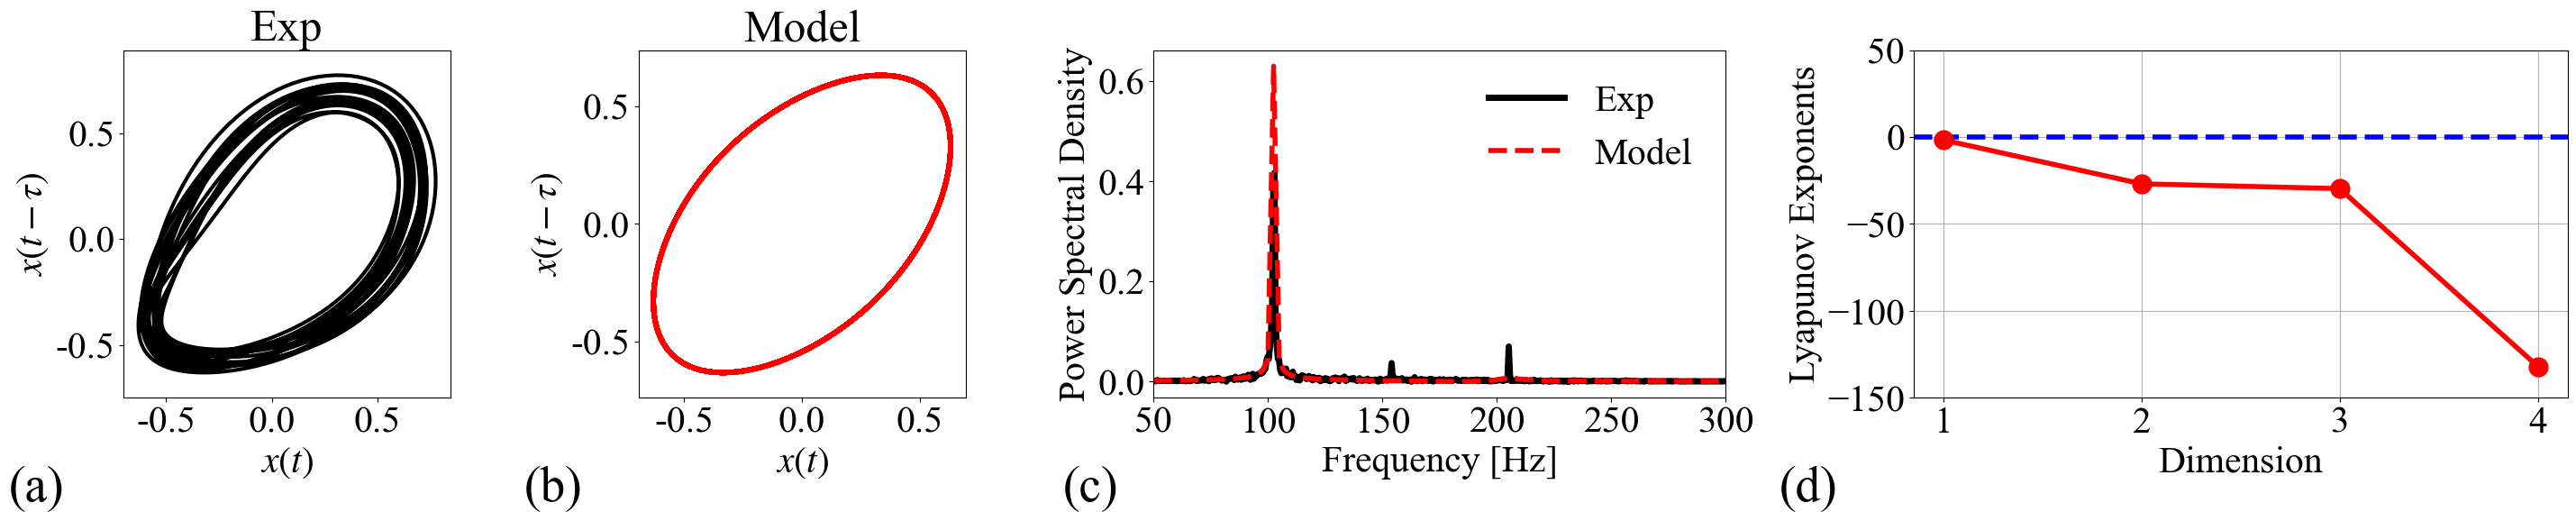

In [15]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=3000, n_plt=2000, n_shift=20, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-150, 50), panel_list = ['(a)', '(b)', '(c)', '(d)'], 

            save_filename='./results/figure/figure07-d2p0-m2p5.png')

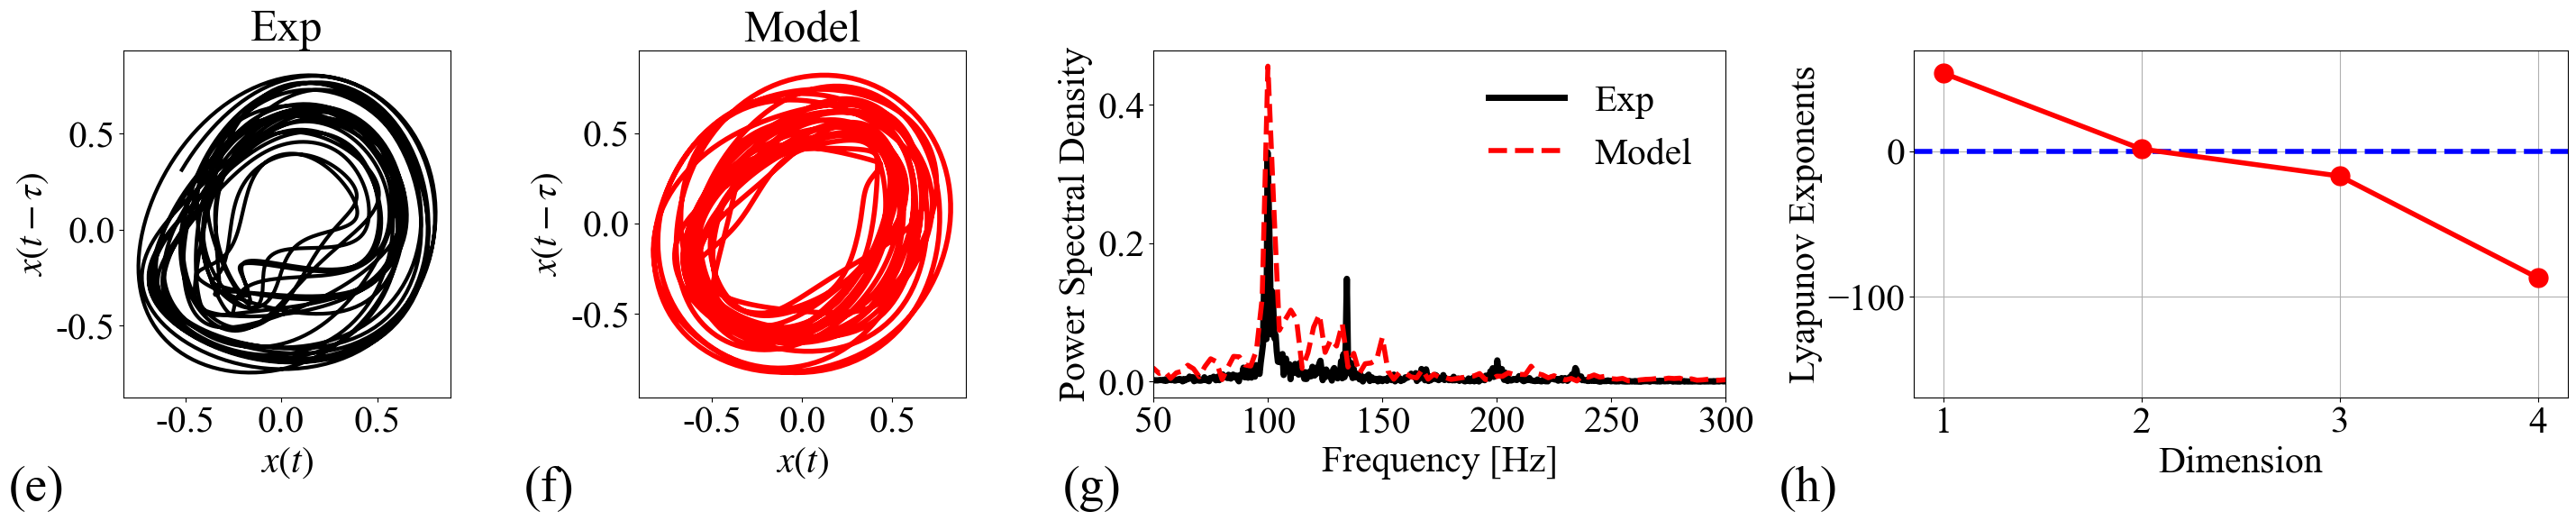

In [24]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,

            ### MRI8_NVF4_10mm_0p0mmVVVV
            n_initdel=2000, n_plt=3000, n_shift=25, same_lim=False, freq_lim=(50, 300), lyapunov_lim=(-170, 70), panel_list = ['(e)', '(f)', '(g)', '(h)'], 

            save_filename='./results/figure/figure07-d1p8-m2p5.eps')

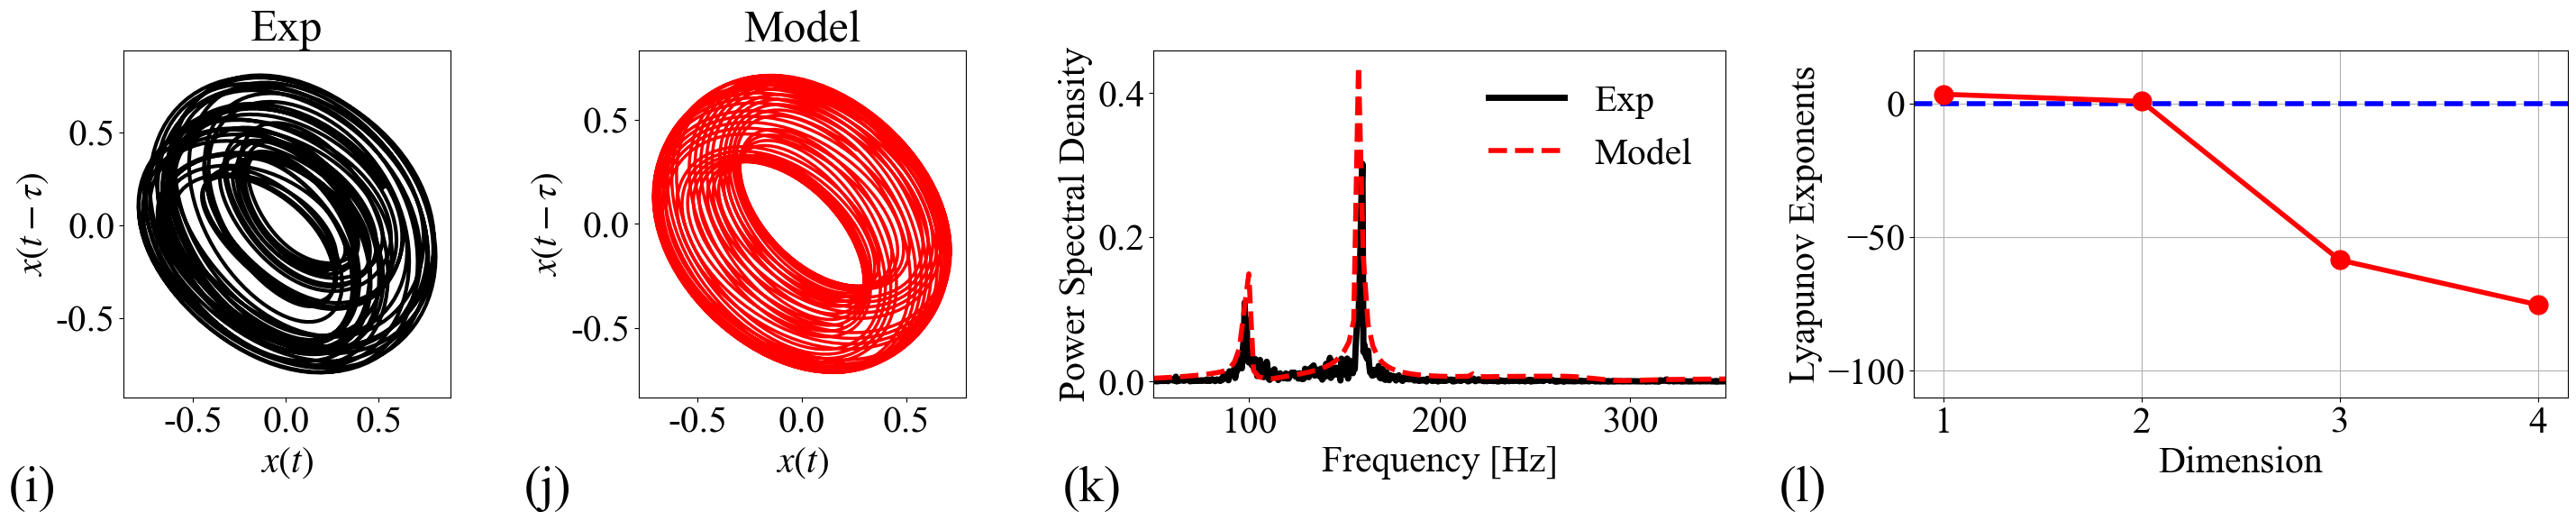

In [15]:
fig.figure03(test_Y[:, 0, 0], esn.freerun_ans[:, 0], test_t[:], esn.lyapunov_exponents,
             
            same_lim=False,
            lw_model=2.5,
            n_shift=25,
            panel_list = ['(i)', '(j)', '(k)', '(l)'], 

            save_filename='./results/figure/figure07-d0p4m0p75.png')